Data cleaning & preprocessing

Import libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt

#supress warnings related to libraries
import warnings
warnings.filterwarnings("ignore")

Read the Data from CSV file in Visual Studio Code (VSC)

In [2]:
df =pd.read_csv("/workspaces/SDS-009-ds-salary-pred/data/salaries.csv", skipinitialspace=True)
#General structure of DS
df.info()
#check if there are any null or missing values
print(df.isna().sum())
# %% of DS
#print(df.isna().sum()/len(df)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB
Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64


Drop duplicates

In [3]:
df = df.drop_duplicates()

Strip before and after Whitespaces from entire data frame records

In [4]:
#Remove leading and following spaces in data
# #strip to all rows
df =df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

#strip to all columns
df.columns = df.columns.str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


Restore Location for NaN values 

In [5]:
df['Location'] =  df.groupby('Company')['Location'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [6]:
#here we group by 'Company' then apply function
df['Location'] =  df.groupby('Company')['Location'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df = df.dropna(subset=['Location'])

df.info()

print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 0 to 867
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        860 non-null    object 
 1   Company Score  782 non-null    float64
 2   Job Title      860 non-null    object 
 3   Location       860 non-null    object 
 4   Date           860 non-null    object 
 5   Salary         757 non-null    object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
Company            0
Company Score     78
Job Title          0
Location           0
Date               0
Salary           103
dtype: int64


Unfold Salary column

In [7]:
df['MIN'] = df['Salary'].str.extract('(\d{1,4})')
df['MAX'] = df['Salary'].str.extract('(.-.\$\d{1,4}K)')
df['MAX'] = df['MAX'].str.extract('(\d{1,4})')
df['Hourly'] = df['Salary'].str.extract('(Per Hour)')
df['Source'] = df['Salary'].str.extract('(\([a-zA-Z]+)')
df['Source'] = df['Source'].str.extract('([a-zA-Z]+)')
df['MIN'] = df['MIN'].astype(float)
df['MAX'] = df['MAX'].astype(float)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
726,Bank of America,3.5,Software Engineer (All Levels),"McLean, VA",30d+,$75K - $131K (Employer est.),75.0,131.0,NaN,Employer
846,NVIDIA,NaN,ServiceNow Sr Software Engineer,"Charlotte, NC",1d,NaN,NaN,NaN,NaN,NaN
312,Capgemini,4.5,Software Engineer,"Santa Clara, CA",9d,$95K - $147K (Glassdoor est.),95.0,147.0,NaN,Glassdoor
151,Sahbi Systems,4.1,Software Engineers,Alabama,18d,$80K - $99K (Glassdoor est.),80.0,99.0,NaN,Glassdoor
350,Solvere Technical Group,3.6,Software Engineer,"Fall River, MA",30d+,$10K - $20K (Employer est.),10.0,20.0,NaN,Employer
...,...,...,...,...,...,...,...,...,...,...
497,"Clarity Innovations, LLC",3.4,"Software Engineer, Mobile (React Native)","Denver, CO",13d,$80K - $110K (Employer est.),80.0,110.0,NaN,Employer
466,DCS Corp,4.8,Software Engineer,"Chantilly, VA",30d+,$160K - $194K (Employer est.),160.0,194.0,NaN,Employer
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN,NaN,NaN,NaN,NaN
75,University of Oregon,3.8,Research Software Engineer,"Eugene, OR",2d,$155K - $180K (Employer est.),155.0,180.0,NaN,Employer


Drop NaN Salaries

In [17]:
df = df[df['MIN'].notna()]
df['MAX'].fillna(df['MIN'],inplace=True)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source,Job Category
255,Pressco Technology,4.5,API Services - Senior Software Engineer - Java...,"Buffalo, NY",10d,$79K - $159K (Employer est.),79.0,79.0,0,Employer,Software Engineer
397,OceanFrogs,2.5,Software Engineer,"Rockville, MD",30d+,$93K - $130K (Glassdoor est.),93.0,93.0,0,Glassdoor,Software Engineer
705,Optum,3.0,2025 Early Career Program: Software Engineering,"Charlotte, NC",4d,$124K - $211K (Employer est.),124.0,124.0,0,Employer,Software Engineer
601,Ford Motor Company,4.1,Node.js/Kotlin Software Engineer IV,"Jacksonville, FL",24d,$61K - $89K (Glassdoor est.),61.0,61.0,0,Glassdoor,Software Engineer
328,Bayer,2.3,Application Programmer Analyst/Developer I,"Fort Collins, CO",5d,$97K - $129K (Glassdoor est.),97.0,97.0,0,Glassdoor,Developer
...,...,...,...,...,...,...,...,...,...,...,...
471,Fusion Innovation,5.0,Software Engineer - Hybrid,"Norcross, GA",3d,$70K - $120K (Employer est.),70.0,70.0,0,Employer,Software Engineer
33,"Crunchyroll, LLC",4.2,"Software Engineer III, Payments","San Francisco, CA",13d,$74K - $118K (Glassdoor est.),74.0,74.0,0,Glassdoor,Software Engineer
5,Spotify,3.9,Backend Engineer II,"New York, NY",1d,$123K - $175K (Employer est.),123.0,123.0,0,Employer,Software Engineer
578,INTEL,5.0,"Software Engineer 2 - Mainframe (Cobol, JCL, V...","Brookfield, WI",12d,$310K - $465K (Employer est.),310.0,310.0,0,Employer,Software Engineer


Mark Per hour salaries

In [18]:
df['Hourly']=df['Hourly'].fillna(0)
df['Hourly']=df['Hourly'].replace(["Per Hour"],1)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source,Job Category
238,NationMind Infoservices Pvt Ltd,3.6,Software Engineer,Florida,16d,$53K - $103K (Employer est.),53.0,53.0,0,Employer,Software Engineer
373,Delta Dental Ins.,4.0,DO178C Software Engineer,"Everett, WA",30d+,$93K - $147K (Glassdoor est.),93.0,93.0,0,Glassdoor,Software Engineer
346,CyberCore Technologies,4.3,Software Engineer 1,Maryland,30d+,$148K - $230K (Employer est.),148.0,148.0,0,Employer,Software Engineer
340,"SICK, Inc.",4.1,Senior Software Engineer,"Point Mugu NAWC, CA",4d,$77K - $102K (Glassdoor est.),77.0,77.0,0,Glassdoor,Software Engineer
75,University of Oregon,3.8,Research Software Engineer,"Eugene, OR",2d,$155K - $180K (Employer est.),155.0,155.0,0,Employer,Software Engineer
...,...,...,...,...,...,...,...,...,...,...,...
93,Parabola,3.8,"Software Engineer, Full Stack",United States,8d,$66K - $94K (Glassdoor est.),66.0,66.0,0,Glassdoor,Software Engineer
131,NCR,3.1,Software Dev Ops Engineer II,Indiana,3d,$69K - $143K (Employer est.),69.0,69.0,0,Employer,Other IT Jobs
227,Hewlett Packard,3.5,Software Engineer,"Spring, TX",10d,$72K - $144K (Employer est.),72.0,72.0,0,Employer,Software Engineer
297,VANTACA,4.5,Test Software Engineer,"Nashua, NH",4d,$100.00 Per Hour (Employer est.),208.0,208.0,1,Employer,Software Engineer


Turn hourly to annual

In [19]:
df[df['Hourly'] == 1].head()

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source,Job Category
86,ILOGIC INC,3.5,SOFTWARE DEVELOPERS,Township of Hamilton,30d+,$80.00 Per Hour (Employer est.),166.4,166.4,1,Employer,Developer
115,Two Six Technologies,4.1,Software Engineer,"Warrenton, VA",17d,$50.00 Per Hour (Employer est.),104.0,104.0,1,Employer,Software Engineer
161,Mailprotector,4.6,Software Engineer,Remote,2d,$50.00 Per Hour (Employer est.),104.0,104.0,1,Employer,Software Engineer
212,Salesforce,3.1,Software Engineering MTS,"San Francisco, CA",3d,$40.00 - $55.00 Per Hour (Employer est.),83.2,83.2,1,Employer,Software Engineer
263,"PeopleTec, Inc.",3.5,Software Engineer- Executions Team,"Chicago, IL",20d,$80.00 - $85.00 Per Hour (Employer est.),166.4,166.4,1,Employer,Software Engineer


In [20]:
#40 hours per week 52 weeks = 2080/1000 -> 2.08K

df['MIN'] = df.apply(lambda row: row['MIN'] * 2.080 if row['Hourly'] == 1 else row['MIN'], axis=1)
df['MAX'] = df['MIN']

df[df['Hourly'] == 1].head()

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source,Job Category
86,ILOGIC INC,3.5,SOFTWARE DEVELOPERS,Township of Hamilton,30d+,$80.00 Per Hour (Employer est.),346.112,346.112,1,Employer,Developer
115,Two Six Technologies,4.1,Software Engineer,"Warrenton, VA",17d,$50.00 Per Hour (Employer est.),216.320,216.320,1,Employer,Software Engineer
161,Mailprotector,4.6,Software Engineer,Remote,2d,$50.00 Per Hour (Employer est.),216.320,216.320,1,Employer,Software Engineer
212,Salesforce,3.1,Software Engineering MTS,"San Francisco, CA",3d,$40.00 - $55.00 Per Hour (Employer est.),173.056,173.056,1,Employer,Software Engineer
263,"PeopleTec, Inc.",3.5,Software Engineer- Executions Team,"Chicago, IL",20d,$80.00 - $85.00 Per Hour (Employer est.),346.112,346.112,1,Employer,Software Engineer


Check the Data Set after cleaning

In [21]:
#General structure of DS
# df.info()
# df=df['Company'].to_string
#check if there are any null or missing values
# print(df.isna().sum())
# %% of DS
#print(df.isna().sum()/len(df)*100)
df['Company'] = df['Company'].astype(str)
df['MIN'] = df['MIN'].astype(float)
df['MAX'] = df['MAX'].astype(float)
df['Hourly'] = df['Hourly'].astype(int)
df['Source'] = df['Source'].astype(str)



# df.info()
print(df.dtypes)

print(df.isna().sum())

Company           object
Company Score    float64
Job Title         object
Location          object
Date              object
Salary            object
MIN              float64
MAX              float64
Hourly             int64
Source            object
Job Category      object
dtype: object
Company          0
Company Score    0
Job Title        0
Location         0
Date             0
Salary           0
MIN              0
MAX              0
Hourly           0
Source           0
Job Category     0
dtype: int64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 0 to 763
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        757 non-null    object 
 1   Company Score  757 non-null    float64
 2   Job Title      757 non-null    object 
 3   Location       757 non-null    object 
 4   Date           757 non-null    object 
 5   Salary         757 non-null    object 
 6   MIN            757 non-null    float64
 7   MAX            757 non-null    float64
 8   Hourly         757 non-null    int64  
 9   Source         757 non-null    object 
 10  Job Category   757 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 71.0+ KB


Job roles classification

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def categorize_job_title(title):
    title = title.lower()  # Convert to lowercase for consistency
    if 'backend' in title or 'frontend' in title or 'software engineer' in title:
        return 'Software Engineer'
    elif 'developer' in title or 'development' in title:
        return 'Developer'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'machine learning' in title or 'ai' in title or 'ml' in title:
        return 'Machine Learning/AI Engineer'
    elif 'devops' in title:
        return 'DevOps Engineer'
    elif 'full stack' in title:
        return 'Full Stack Developer'
    elif 'test' in title or 'quality' in title: 
        return 'QA Engineer'
    else:
        return 'Other IT Jobs'
    

df['Job Category'] = df['Job Title'].apply(categorize_job_title)

print(df)



                           Company  Company Score  \
0                         ViewSoft            4.8   
1                          Workiva            4.3   
2       Garmin International, Inc.            3.9   
3                         Snapchat            3.5   
4    Vitesco Technologies Group AG            3.1   
..                             ...            ...   
759                         OpenAI            3.1   
760                     NCR Atleos            3.9   
761  Electronic Warfare Associates            3.8   
762                   BillGO, Inc.            3.3   
763                        Genesys            3.6   

                                             Job Title           Location  \
0                                    Software Engineer       Manassas, VA   
1                            Software Support Engineer             Remote   
2                                 C# Software Engineer           Cary, NC   
3    Software Engineer, Fullstack, 1+ Years of Expe... 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Other IT Jobs'),
  Text(2, 0, 'Developer'),
  Text(3, 0, 'QA Engineer'),
  Text(4, 0, 'DevOps Engineer'),
  Text(5, 0, 'Machine Learning/AI Engineer'),
  Text(6, 0, 'Full Stack Developer')])

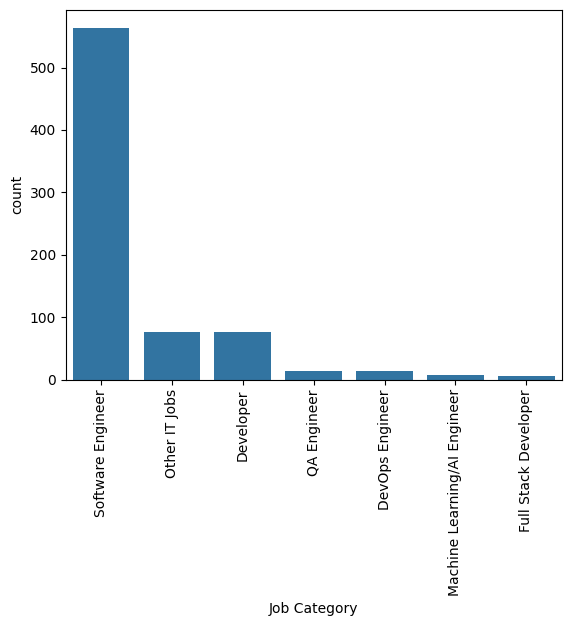

In [25]:
sns.countplot(x='Job Category', data=df)
plt.xticks(rotation = 90)

Factorize straing values

In [26]:
df['Company_Code'] = pd.factorize(df['Company'])[0]
df['Location_Code'] = pd.factorize(df['Location'])[0]
df['Job_Code'] = pd.factorize(df['Job Category'])[0]



Drop odd columns

In [27]:
df = df.drop(['Job Title'], axis =1)
df = df.drop(['Date'], axis =1)
df = df.drop(['Salary'], axis =1)
df = df.drop(['Company'], axis =1)
df = df.drop(['Location'], axis =1)
df = df.drop(['Source'], axis =1)
df = df.drop(['Job Category'], axis =1)
df = df.drop(['Hourly'], axis =1)
df

,Company Score,MIN,MAX,Company_Code,Location_Code,Job_Code
0,4.8,68.0,68.0,0,0,0
1,4.3,61.0,61.0,1,1,1
2,3.9,95.0,95.0,2,2,0
3,3.5,97.0,97.0,3,3,0
4,3.1,85.0,85.0,4,4,0
...,...,...,...,...,...,...
759,3.1,160.0,160.0,175,255,0
760,3.9,222.0,222.0,576,158,0
761,3.8,82.0,82.0,577,9,0
762,3.3,69.0,69.0,578,298,0


Add average salary AVG

In [28]:
df['AVG'] = df[['MIN', 'MAX']].mean(axis=1)

df

,Company Score,MIN,MAX,Company_Code,Location_Code,Job_Code,AVG
0,4.8,68.0,68.0,0,0,0,68.0
1,4.3,61.0,61.0,1,1,1,61.0
2,3.9,95.0,95.0,2,2,0,95.0
3,3.5,97.0,97.0,3,3,0,97.0
4,3.1,85.0,85.0,4,4,0,85.0
...,...,...,...,...,...,...,...
759,3.1,160.0,160.0,175,255,0,160.0
760,3.9,222.0,222.0,576,158,0,222.0
761,3.8,82.0,82.0,577,9,0,82.0
762,3.3,69.0,69.0,578,298,0,69.0


2. Features selection

     https://youtu.be/hCwTDTdYirg?si=gykASdD21iaigCOb

Train/test split 

In [53]:
#import Libraries
from sklearn.model_selection import train_test_split

X = df.drop(['MIN'], axis =1)
X = X.drop(['MAX'], axis =1)
X = X.drop(['AVG'], axis =1)

# y = df[['MIN','MAX','AVG' ]] 
y = df['AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)
#stratify=y - makes no sense? 

print(X_train.shape)
print(X_test.shape)


(529, 4)
(228, 4)


Define Baseline Model: Gradient Boosting Classifier with all features

In [30]:
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Label encoding
lab_enc = preprocessing.LabelEncoder()
encoded_y_train = lab_enc.fit_transform(y_train)
encoded_y_test = lab_enc.fit_transform(y_test)

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

# Train classifier using all features
# gbc.fit(X_train, y_train)
gbc.fit(X_train, encoded_y_train)

# Make predictions
preds = gbc.predict(X_test)

# Evaluate the model using the F1-score
# f1_score_all = round(f1_score(y_test, preds, average='weighted'), 3)
f1_score_all = round(f1_score(encoded_y_test, preds, average='weighted'), 3)

print(f1_score_all)

0.011


Variance threshold

In [31]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

#Check for variance for each feature

X_train_v1.var(axis=0)

Company Score        0.263198
Company_Code     28001.497186
Location_Code     7430.018238
Job_Code             1.230030
dtype: float64

Values Scaling

In [32]:
#Without scaling the values above makes no sense. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

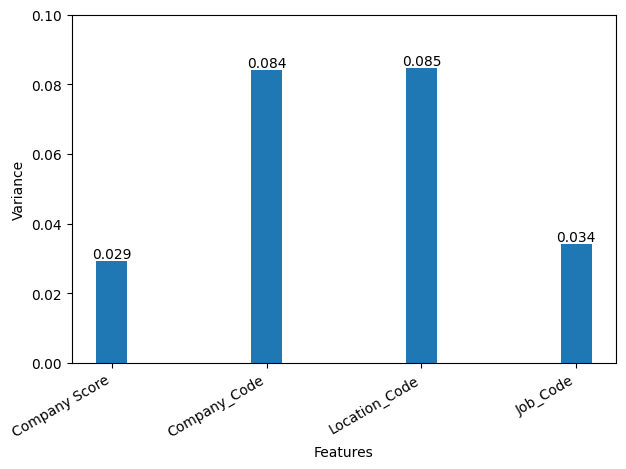

In [24]:
fig, ax = plt.subplots()

x = X.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.1)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()

In [33]:
#I set the trashold of 0.03. So that the Company Score should be dropped. 

sel_X_train_v1 = X_train_v1.drop(['Company Score'], axis=1)
sel_X_test_v1 = X_test_v1.drop(['Company Score'], axis=1)

# gbc.fit(sel_X_train_v1, y_train)
gbc.fit(sel_X_train_v1, encoded_y_train)

var_preds = gbc.predict(sel_X_test_v1)

# encoding
encoded_y_test_v1 = lab_enc.fit_transform(y_test_v1)

f1_score_var = round(f1_score(encoded_y_test_v1, var_preds, average='weighted'), 3)

print(f1_score_var)

0.012


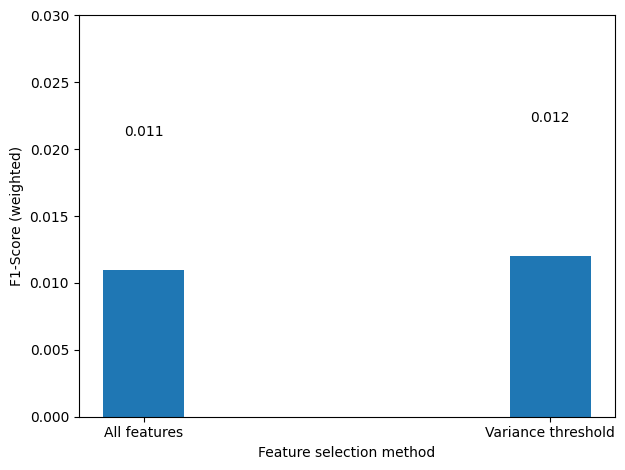

In [34]:
#plot it

fig, ax = plt.subplots()

x = ['All features', 'Variance threshold']
y = [f1_score_all, f1_score_var]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.03)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01, s=str(round(value,3)), ha='center')
    
plt.tight_layout()

K-best features

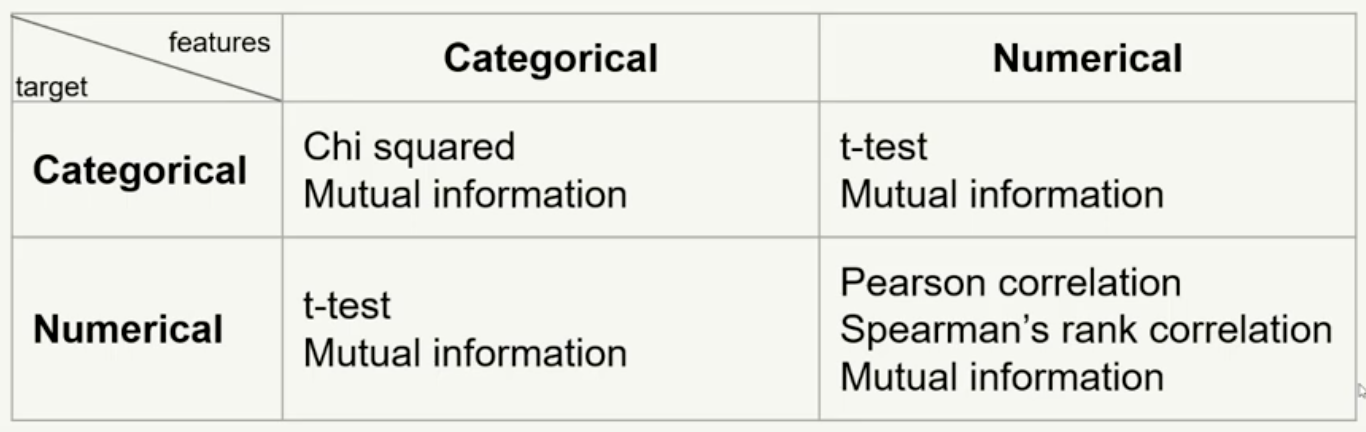

Works good for smal data sets only :(

In [35]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

#encoding
encoded_y_train_v2 = lab_enc.fit_transform(y_train_v2)
encoded_y_test_v2 = lab_enc.fit_transform(y_test_v2)


for k in range(1, 5):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, encoded_y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    gbc.fit(sel_X_train_v2, encoded_y_train_v2)
    kbest_preds = gbc.predict(sel_X_test_v2)
    
    f1_score_kbest = round(f1_score(encoded_y_test_v2, kbest_preds, average='weighted'), 3)
    
    f1_score_list.append(f1_score_kbest)

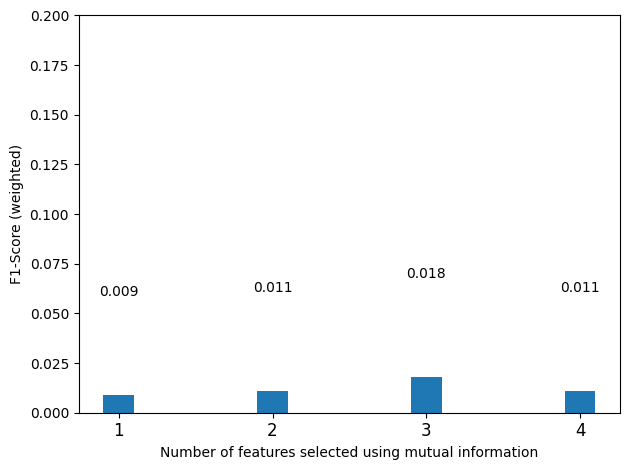

In [37]:
fig, ax = plt.subplots()

x = np.arange(1, 5)
y = f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.2)
ax.set_xticks(np.arange(1, 5))
ax.set_xticklabels(np.arange(1, 5), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [38]:
selector = SelectKBest(mutual_info_classif, k=3)
selector.fit(X_train_v2, encoded_y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['Company Score', 'Location_Code', 'Job_Code'], dtype='object')

RFE - Recursive feature elimination 

In [39]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [40]:
from sklearn.feature_selection import RFE

rfe_f1_score_list = []

encoded_y_train_v3 = lab_enc.fit_transform(y_train_v3)
encoded_y_test_v3 = lab_enc.fit_transform(y_test_v3)


for k in range(1, 5):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v3, encoded_y_train_v3)
    
    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)
    
    gbc.fit(sel_X_train_v3, encoded_y_train_v3)
    RFE_preds = gbc.predict(sel_X_test_v3)
    
    f1_score_rfe = round(f1_score(encoded_y_test_v3, RFE_preds, average='weighted'), 3)
    
    rfe_f1_score_list.append(f1_score_rfe)

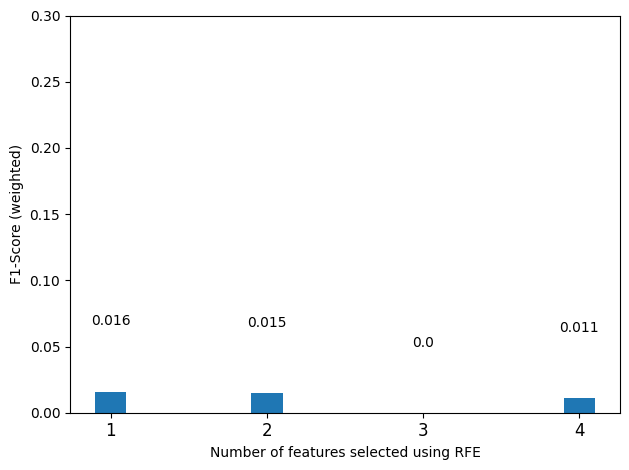

In [41]:
fig, ax = plt.subplots()

x = np.arange(1, 5)
y = rfe_f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.3)
ax.set_xticks(np.arange(1, 5))
ax.set_xticklabels(np.arange(1, 5), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [44]:
RFE_selector = RFE(estimator=gbc, n_features_to_select=3, step=1)
RFE_selector.fit(X_train_v3, encoded_y_train_v3)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['Company Score', 'Company_Code', 'Location_Code'], dtype='object')

Boruta

term:> pip install Boruta

In [54]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [62]:
from boruta import BorutaPy

encoded_y_train_v4 = lab_enc.fit_transform(y_train_v4)
encoded_y_test_v4 = lab_enc.fit_transform(y_test_v4)

boruta_selector = BorutaPy(gbc, random_state=42)

# boruta_selector.fit(X_train_v4.values, encoded_y_train_v4.values.ravel())

boruta_selector.fit(X_train_v4, encoded_y_train_v4)


sel_X_train_v4 = boruta_selector.transform(X_train_v4)
sel_X_test_v4 = boruta_selector.transform(X_test_v4)

gbc.fit(sel_X_train_v4, encoded_y_train_v4)

boruta_preds = gbc.predict(sel_X_test_v4)

boruta_f1_score = round(f1_score(encoded_y_test_v4, boruta_preds, average='weighted'), 3)

InvalidIndexError: (slice(None, None, None), array([False, False, False, False]))

In [ ]:
selected_features_mask = boruta_selector.support_

selected_features = X_train_v4.columns[selected_features_mask]
selected_features

In [ ]:
fig, ax = plt.subplots()

x = ['All features (4)', 'Variance threshold (3)', 'Filter - MI (3)', 'RFE (3)', 'Boruta (9)']
y = [f1_score_all, f1_score_var, 0.018, max(rfe_f1_score_list), boruta_f1_score]



ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.3)

for i, v in enumerate(y):
    plt.text(x=i, y=v+0.01, s=str(v), ha='center')
    
plt.tight_layout()